In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc50 = np.loadtxt('./random_ipc_index/cifar100/ipc_50.txt', dtype=int)
ipc50

array([35640, 47103, 38839, ..., 48602, 17907, 37111])

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 8
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc50))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

625

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ResNet18'
dataset = 'cifar100_ipc50'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = torchvision.models.resnet18(num_classes=100).to(device)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1:   0%|          | 1/625 [00:00<03:51,  2.69it/s, loss=4.95]c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 1: 100%|██████████| 625/625 [00:12<00:00, 51.07it/s, loss=4.55]


epoch: 1 done, loss: 0.06393446773290634
Acc: 0.0209
[0.01]


Epoch 2: 100%|██████████| 625/625 [00:17<00:00, 35.75it/s, loss=4.61]


epoch: 2 done, loss: 0.05632392317056656
Acc: 0.0552
[0.01]


Epoch 3: 100%|██████████| 625/625 [00:13<00:00, 47.76it/s, loss=4.02]


epoch: 3 done, loss: 0.054210711270570755
Acc: 0.0658
[0.01]


Epoch 4: 100%|██████████| 625/625 [00:13<00:00, 47.91it/s, loss=4.56]


epoch: 4 done, loss: 0.0528569221496582
Acc: 0.0761
[0.01]


Epoch 5: 100%|██████████| 625/625 [00:12<00:00, 50.99it/s, loss=3.69]


epoch: 5 done, loss: 0.052257660776376724
Acc: 0.0881
[0.01]


Epoch 6: 100%|██████████| 625/625 [00:10<00:00, 57.91it/s, loss=4.42]


epoch: 6 done, loss: 0.0513598769903183
Acc: 0.0864
[0.01]


Epoch 7: 100%|██████████| 625/625 [00:16<00:00, 37.55it/s, loss=4.24]


epoch: 7 done, loss: 0.05061525106430054
Acc: 0.1033
[0.01]


Epoch 8: 100%|██████████| 625/625 [00:14<00:00, 43.68it/s, loss=4.06]


epoch: 8 done, loss: 0.049548812210559845
Acc: 0.1027
[0.01]


Epoch 9: 100%|██████████| 625/625 [00:12<00:00, 48.35it/s, loss=3.84]


epoch: 9 done, loss: 0.049232956022024155
Acc: 0.1132
[0.01]


Epoch 10: 100%|██████████| 625/625 [00:12<00:00, 49.41it/s, loss=4.34]


epoch: 10 done, loss: 0.04943779483437538
Acc: 0.1291
[0.01]


Epoch 11: 100%|██████████| 625/625 [00:09<00:00, 62.63it/s, loss=3.2] 


epoch: 11 done, loss: 0.04839238524436951
Acc: 0.1227
[0.01]


Epoch 12: 100%|██████████| 625/625 [00:15<00:00, 39.92it/s, loss=3.91]


epoch: 12 done, loss: 0.04808441922068596
Acc: 0.1262
[0.01]


Epoch 13: 100%|██████████| 625/625 [00:17<00:00, 36.53it/s, loss=4.17]


epoch: 13 done, loss: 0.047930747270584106
Acc: 0.1226
[0.01]


Epoch 14: 100%|██████████| 625/625 [00:12<00:00, 50.88it/s, loss=3.96]


epoch: 14 done, loss: 0.04768145829439163
Acc: 0.0967
[0.001]


Epoch 15: 100%|██████████| 625/625 [00:13<00:00, 47.51it/s, loss=4.01]


epoch: 15 done, loss: 0.047568511217832565
Acc: 0.1421
[0.001]


Epoch 16: 100%|██████████| 625/625 [00:10<00:00, 57.07it/s, loss=2.63]


epoch: 16 done, loss: 0.04591546580195427
Acc: 0.1578
[0.001]


Epoch 17: 100%|██████████| 625/625 [00:13<00:00, 46.57it/s, loss=3.05]


epoch: 17 done, loss: 0.04471546411514282
Acc: 0.1671
[0.001]


Epoch 18: 100%|██████████| 625/625 [00:17<00:00, 36.67it/s, loss=4.05]


epoch: 18 done, loss: 0.043998319655656815
Acc: 0.169
[0.001]


Epoch 19: 100%|██████████| 625/625 [00:12<00:00, 48.26it/s, loss=3.62]


epoch: 19 done, loss: 0.04363379627466202
Acc: 0.1763
[0.001]


Epoch 20: 100%|██████████| 625/625 [00:13<00:00, 46.89it/s, loss=3.22]


epoch: 20 done, loss: 0.04321508854627609
Acc: 0.1771
[0.001]


Epoch 21: 100%|██████████| 625/625 [00:12<00:00, 51.44it/s, loss=3.03]


epoch: 21 done, loss: 0.04287179931998253
Acc: 0.1709
[0.001]


Epoch 22: 100%|██████████| 625/625 [00:11<00:00, 55.51it/s, loss=3.75]


epoch: 22 done, loss: 0.04243599623441696
Acc: 0.1815
[0.001]


Epoch 23: 100%|██████████| 625/625 [00:16<00:00, 38.17it/s, loss=3.03]


epoch: 23 done, loss: 0.04207608848810196
Acc: 0.1858
[0.001]


Epoch 24: 100%|██████████| 625/625 [00:14<00:00, 41.79it/s, loss=3.5] 


epoch: 24 done, loss: 0.041267890483140945
Acc: 0.1821
[0.001]


Epoch 25: 100%|██████████| 625/625 [00:13<00:00, 48.02it/s, loss=3.12]


epoch: 25 done, loss: 0.04154928773641586
Acc: 0.1907
[0.001]


Epoch 26: 100%|██████████| 625/625 [00:12<00:00, 48.67it/s, loss=2.43]


epoch: 26 done, loss: 0.04110339283943176
Acc: 0.1871
[0.001]


Epoch 27: 100%|██████████| 625/625 [00:09<00:00, 66.08it/s, loss=4.61]


epoch: 27 done, loss: 0.04063546657562256
Acc: 0.1957
[0.001]


Epoch 28: 100%|██████████| 625/625 [00:15<00:00, 39.81it/s, loss=3.72]


epoch: 28 done, loss: 0.04038620740175247
Acc: 0.1912
[0.001]


Epoch 29: 100%|██████████| 625/625 [00:15<00:00, 39.48it/s, loss=2.32]


epoch: 29 done, loss: 0.03999033942818642
Acc: 0.1996
[0.001]


Epoch 30: 100%|██████████| 625/625 [00:13<00:00, 47.92it/s, loss=2.58]


epoch: 30 done, loss: 0.039659809321165085
Acc: 0.2018
[0.001]


Epoch 31: 100%|██████████| 625/625 [00:13<00:00, 46.14it/s, loss=3.75]


epoch: 31 done, loss: 0.03938888758420944
Acc: 0.1964
[0.001]


Epoch 32: 100%|██████████| 625/625 [00:09<00:00, 63.86it/s, loss=3.23]


epoch: 32 done, loss: 0.03885137662291527
Acc: 0.1968
[0.001]


Epoch 33: 100%|██████████| 625/625 [00:14<00:00, 43.31it/s, loss=2.8] 


epoch: 33 done, loss: 0.03906036913394928
Acc: 0.2002
[0.001]


Epoch 34: 100%|██████████| 625/625 [00:16<00:00, 36.78it/s, loss=2.89]


epoch: 34 done, loss: 0.03866427764296532
Acc: 0.2067
[0.0001]


Epoch 35: 100%|██████████| 625/625 [00:12<00:00, 49.06it/s, loss=3.06]


epoch: 35 done, loss: 0.03750210255384445
Acc: 0.2103
[0.0001]


Epoch 36: 100%|██████████| 625/625 [00:13<00:00, 44.74it/s, loss=2.95]


epoch: 36 done, loss: 0.03789893537759781
Acc: 0.2144
[0.0001]


Epoch 37: 100%|██████████| 625/625 [00:10<00:00, 57.61it/s, loss=3.86]


epoch: 37 done, loss: 0.037375308573246
Acc: 0.2187
[0.0001]


Epoch 38: 100%|██████████| 625/625 [00:12<00:00, 49.36it/s, loss=3.32]


epoch: 38 done, loss: 0.03734652325510979
Acc: 0.2155
[0.0001]


Epoch 39: 100%|██████████| 625/625 [00:16<00:00, 37.02it/s, loss=2.81]


epoch: 39 done, loss: 0.037151630967855453
Acc: 0.2086
[0.0001]


Epoch 40: 100%|██████████| 625/625 [00:13<00:00, 46.01it/s, loss=3.28]


epoch: 40 done, loss: 0.037101391702890396
Acc: 0.2127
[0.0001]


Epoch 41: 100%|██████████| 625/625 [00:14<00:00, 44.48it/s, loss=2.91]


epoch: 41 done, loss: 0.037213120609521866
Acc: 0.2093
[1e-05]


Epoch 42: 100%|██████████| 625/625 [00:12<00:00, 49.20it/s, loss=2.88]


epoch: 42 done, loss: 0.0369211807847023
Acc: 0.216
[1e-05]


Epoch 43: 100%|██████████| 625/625 [00:10<00:00, 59.78it/s, loss=3.48]


epoch: 43 done, loss: 0.03669185936450958
Acc: 0.2174
[1e-05]


Epoch 44: 100%|██████████| 625/625 [00:16<00:00, 38.75it/s, loss=2.77]


epoch: 44 done, loss: 0.036647308617830276
Acc: 0.2104
[1e-05]


Epoch 45: 100%|██████████| 625/625 [00:15<00:00, 41.41it/s, loss=3.4] 


epoch: 45 done, loss: 0.036908190697431564
Acc: 0.21
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 625/625 [00:13<00:00, 46.32it/s, loss=2.74]


epoch: 46 done, loss: 0.036716558039188385
Acc: 0.2102
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 625/625 [00:13<00:00, 47.92it/s, loss=2.63]


epoch: 47 done, loss: 0.03675168380141258
Acc: 0.2174
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 625/625 [00:09<00:00, 65.39it/s, loss=2.7] 


epoch: 48 done, loss: 0.036651503294706345
Acc: 0.2107
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 625/625 [00:15<00:00, 40.86it/s, loss=2.32]


epoch: 49 done, loss: 0.03690040111541748
Acc: 0.2144
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 625/625 [00:16<00:00, 38.05it/s, loss=2.57]


epoch: 50 done, loss: 0.036561910063028336
Acc: 0.2142
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 625/625 [00:12<00:00, 48.38it/s, loss=3.09]


epoch: 51 done, loss: 0.03665542975068092
Acc: 0.2224
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 625/625 [00:13<00:00, 45.48it/s, loss=3.06]


epoch: 52 done, loss: 0.03671897202730179
Acc: 0.2122
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 625/625 [00:10<00:00, 57.40it/s, loss=2.67]


epoch: 53 done, loss: 0.0369424894452095
Acc: 0.2193
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 625/625 [00:12<00:00, 48.77it/s, loss=3.06]


epoch: 54 done, loss: 0.036784809082746506
Acc: 0.2159
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 625/625 [00:16<00:00, 37.49it/s, loss=3.15]


epoch: 55 done, loss: 0.036636896431446075
Acc: 0.2117
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 625/625 [00:13<00:00, 44.76it/s, loss=2.39]


epoch: 56 done, loss: 0.036730021238327026
Acc: 0.2118
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 625/625 [00:14<00:00, 43.04it/s, loss=3.09]


epoch: 57 done, loss: 0.03673166409134865
Acc: 0.2163
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 625/625 [00:13<00:00, 47.54it/s, loss=3.7] 


epoch: 58 done, loss: 0.036960043013095856
Acc: 0.2067
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 625/625 [00:09<00:00, 62.82it/s, loss=3.15]


epoch: 59 done, loss: 0.03671688213944435
Acc: 0.214
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 625/625 [00:15<00:00, 40.44it/s, loss=2.93]


epoch: 60 done, loss: 0.037026919424533844
Acc: 0.2138
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 625/625 [00:16<00:00, 38.67it/s, loss=1.98]


epoch: 61 done, loss: 0.03687237203121185
Acc: 0.2169
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 625/625 [00:14<00:00, 44.58it/s, loss=2.62]


epoch: 62 done, loss: 0.03685227781534195
Acc: 0.2157
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 625/625 [00:14<00:00, 43.73it/s, loss=2.92]


epoch: 63 done, loss: 0.0367821529507637
Acc: 0.2168
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 625/625 [00:10<00:00, 60.47it/s, loss=3.71]


epoch: 64 done, loss: 0.03644424304366112
Acc: 0.2171
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 625/625 [00:13<00:00, 46.67it/s, loss=3.48]


epoch: 65 done, loss: 0.0366843119263649
Acc: 0.2132
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 625/625 [00:16<00:00, 36.95it/s, loss=1.9] 


epoch: 66 done, loss: 0.036832258105278015
Acc: 0.216
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 625/625 [00:14<00:00, 42.55it/s, loss=4.28]


epoch: 67 done, loss: 0.03635659068822861
Acc: 0.2162
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 625/625 [00:14<00:00, 41.83it/s, loss=4.27]


epoch: 68 done, loss: 0.03656105697154999
Acc: 0.2175
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 625/625 [00:13<00:00, 46.93it/s, loss=2.54]


epoch: 69 done, loss: 0.03664205223321915
Acc: 0.22
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 625/625 [00:09<00:00, 65.67it/s, loss=3.79]


epoch: 70 done, loss: 0.03656544163823128
Acc: 0.2147
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 625/625 [00:15<00:00, 40.85it/s, loss=4.29]


epoch: 71 done, loss: 0.03660674765706062
Acc: 0.2186
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 625/625 [00:16<00:00, 39.06it/s, loss=2.86]


epoch: 72 done, loss: 0.03664448857307434
Acc: 0.2195
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 625/625 [00:14<00:00, 44.23it/s, loss=3]   


epoch: 73 done, loss: 0.03671484440565109
Acc: 0.2148
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 625/625 [00:14<00:00, 42.55it/s, loss=3.15]


epoch: 74 done, loss: 0.03687151148915291
Acc: 0.2224
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 625/625 [00:10<00:00, 59.45it/s, loss=1.59]


epoch: 75 done, loss: 0.0365237258374691
Acc: 0.2175
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 625/625 [00:12<00:00, 49.27it/s, loss=3.81]


epoch: 76 done, loss: 0.036722540855407715
Acc: 0.2154
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 625/625 [00:15<00:00, 39.18it/s, loss=2.08]


epoch: 77 done, loss: 0.03665544465184212
Acc: 0.2143
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 625/625 [00:14<00:00, 42.86it/s, loss=2.54]


epoch: 78 done, loss: 0.03673386201262474
Acc: 0.2177
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 625/625 [00:15<00:00, 41.17it/s, loss=2.99]


epoch: 79 done, loss: 0.03669583052396774
Acc: 0.2205
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 625/625 [00:13<00:00, 44.70it/s, loss=3.56]


epoch: 80 done, loss: 0.03665846958756447
Acc: 0.2062
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 625/625 [00:09<00:00, 68.33it/s, loss=3.42]


epoch: 81 done, loss: 0.036830805242061615
Acc: 0.2164
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 625/625 [00:14<00:00, 41.99it/s, loss=3.27]


epoch: 82 done, loss: 0.0365237332880497
Acc: 0.2105
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 625/625 [00:15<00:00, 40.13it/s, loss=3.21]


epoch: 83 done, loss: 0.037138789892196655
Acc: 0.2204
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 625/625 [00:14<00:00, 42.57it/s, loss=3.32]


epoch: 84 done, loss: 0.036421529948711395
Acc: 0.2189
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 625/625 [00:15<00:00, 41.16it/s, loss=1.92]


epoch: 85 done, loss: 0.036915119737386703
Acc: 0.2201
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 625/625 [00:10<00:00, 57.46it/s, loss=2.51]


epoch: 86 done, loss: 0.03700290247797966
Acc: 0.2181
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 625/625 [00:12<00:00, 51.13it/s, loss=2.48]


epoch: 87 done, loss: 0.0368586890399456
Acc: 0.2157
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 625/625 [00:15<00:00, 40.43it/s, loss=3.05]


epoch: 88 done, loss: 0.03692534193396568
Acc: 0.2187
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 625/625 [00:14<00:00, 44.11it/s, loss=2.74]


epoch: 89 done, loss: 0.03680313751101494
Acc: 0.2174
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 625/625 [00:16<00:00, 39.00it/s, loss=3.76]


epoch: 90 done, loss: 0.03720487654209137
Acc: 0.2132
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 625/625 [00:14<00:00, 42.73it/s, loss=2.98]


epoch: 91 done, loss: 0.0369153656065464
Acc: 0.2173
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 625/625 [00:09<00:00, 67.77it/s, loss=3.36]


epoch: 92 done, loss: 0.03692983090877533
Acc: 0.2102
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 625/625 [00:13<00:00, 45.32it/s, loss=2.65]


epoch: 93 done, loss: 0.03664804995059967
Acc: 0.2193
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 625/625 [00:14<00:00, 43.73it/s, loss=3.42]


epoch: 94 done, loss: 0.036595359444618225
Acc: 0.2179
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 625/625 [00:15<00:00, 41.28it/s, loss=3.16]


epoch: 95 done, loss: 0.0372222475707531
Acc: 0.2108
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 625/625 [00:16<00:00, 38.21it/s, loss=2.81]


epoch: 96 done, loss: 0.03695160895586014
Acc: 0.2192
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 625/625 [00:11<00:00, 52.10it/s, loss=2.99]


epoch: 97 done, loss: 0.036770690232515335
Acc: 0.2148
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 625/625 [00:11<00:00, 56.04it/s, loss=3.29]


epoch: 98 done, loss: 0.03654885292053223
Acc: 0.2113
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 625/625 [00:14<00:00, 43.48it/s, loss=2.63]


epoch: 99 done, loss: 0.036492422223091125
Acc: 0.2149
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 625/625 [00:13<00:00, 46.76it/s, loss=2.81]


epoch: 100 done, loss: 0.036509864032268524
Acc: 0.2178
[1.0000000000000002e-06]
Time taken: 2418.18791 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2224, tensor(0.4138, device='cuda:0'))

<AxesSubplot: >

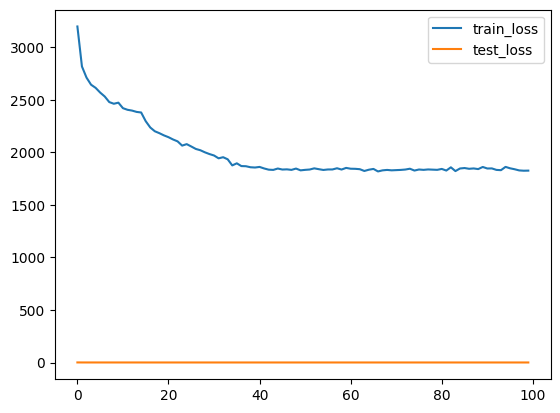

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])